# import modules

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict, cross_val_score

# helper functions (if necessary)

In [9]:
#python code...

# read in training data

In [10]:
train_df = pd.read_csv('train.csv')
print(train_df)

       A   B   C   D   E   F   G  Location
0    -52 -54 -52 -49 -63 -86 -81         3
1    -60 -54 -59 -65 -66 -83 -84         1
2    -60 -55 -46 -59 -49 -87 -83         4
3    -50 -55 -54 -50 -69 -79 -82         3
4    -51 -56 -60 -48 -60 -86 -83         3
...   ..  ..  ..  ..  ..  ..  ..       ...
1595 -40 -70 -47 -43 -69 -73 -84         2
1596 -48 -57 -54 -50 -66 -83 -78         3
1597 -59 -51 -55 -59 -53 -88 -88         4
1598 -37 -58 -56 -38 -63 -75 -74         2
1599 -36 -61 -57 -27 -71 -73 -70         2

[1600 rows x 8 columns]


# analyze and visualize training data

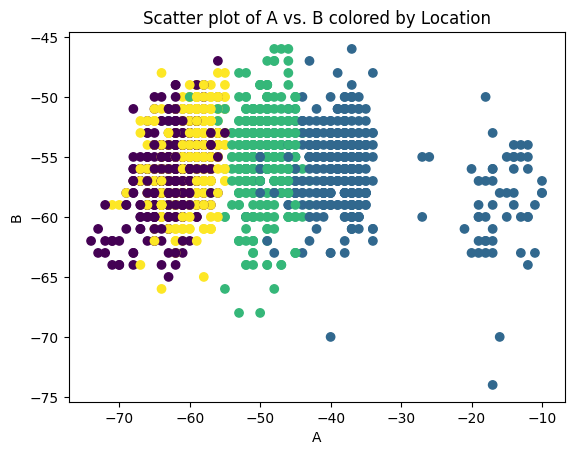

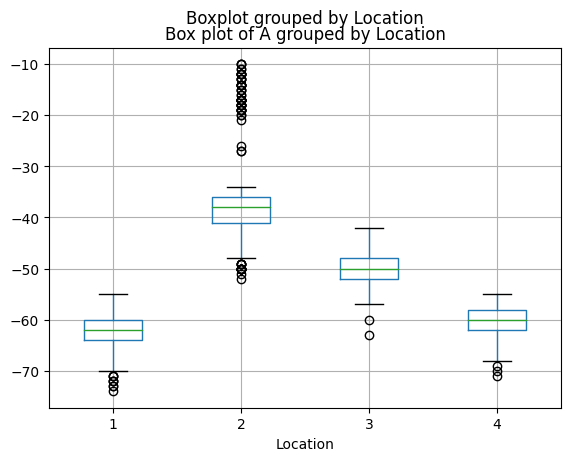

In [11]:
plt.scatter(train_df['A'], train_df['B'], c=train_df['Location'])
plt.xlabel('A')
plt.ylabel('B')
plt.title('Scatter plot of A vs. B colored by Location')
plt.show()

train_df.boxplot(column=['A'], by='Location')
plt.title('Box plot of A grouped by Location')
plt.show()

# experiment with classification

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Prepare data for training
features = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
X_train = train_df[features]
y_train = train_df['Location']

# Train model with different parameters
models = []
C_values = [0.1, 1, 10, 100]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
for C in C_values:
    for kernel in kernel_values:
        model = SVC(C=C, kernel=kernel)
        model.fit(X_train, y_train)
        models.append(model)

# Evaluate models with cross-validation
best_model = None
best_accuracy = 0
best_precision = 0
best_recall = 0
for model in models:
    y_pred = cross_val_predict(model, X_train, y_train, cv=5)
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='weighted')
    recall = recall_score(y_train, y_pred, average='weighted')
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall
    print(f'Cross-validation accuracy for C={model.C} and kernel={model.kernel}: {accuracy:.2f}')
    print(f'Cross-validation precision for C={model.C} and kernel={model.kernel}: {precision:.2f}')
    print(f'Cross-validation recall for C={model.C} and kernel={model.kernel}: {recall:.2f}')


Cross-validation accuracy for C=0.1 and kernel=linear: 0.98
Cross-validation precision for C=0.1 and kernel=linear: 0.98
Cross-validation recall for C=0.1 and kernel=linear: 0.98
Cross-validation accuracy for C=0.1 and kernel=poly: 0.98
Cross-validation precision for C=0.1 and kernel=poly: 0.98
Cross-validation recall for C=0.1 and kernel=poly: 0.98
Cross-validation accuracy for C=0.1 and kernel=rbf: 0.98
Cross-validation precision for C=0.1 and kernel=rbf: 0.98
Cross-validation recall for C=0.1 and kernel=rbf: 0.98


M:\Python 3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-validation accuracy for C=0.1 and kernel=sigmoid: 0.25
Cross-validation precision for C=0.1 and kernel=sigmoid: 0.06
Cross-validation recall for C=0.1 and kernel=sigmoid: 0.25
Cross-validation accuracy for C=1 and kernel=linear: 0.98
Cross-validation precision for C=1 and kernel=linear: 0.98
Cross-validation recall for C=1 and kernel=linear: 0.98
Cross-validation accuracy for C=1 and kernel=poly: 0.98
Cross-validation precision for C=1 and kernel=poly: 0.98
Cross-validation recall for C=1 and kernel=poly: 0.98
Cross-validation accuracy for C=1 and kernel=rbf: 0.98
Cross-validation precision for C=1 and kernel=rbf: 0.98
Cross-validation recall for C=1 and kernel=rbf: 0.98


M:\Python 3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-validation accuracy for C=1 and kernel=sigmoid: 0.25
Cross-validation precision for C=1 and kernel=sigmoid: 0.06
Cross-validation recall for C=1 and kernel=sigmoid: 0.25
Cross-validation accuracy for C=10 and kernel=linear: 0.98
Cross-validation precision for C=10 and kernel=linear: 0.98
Cross-validation recall for C=10 and kernel=linear: 0.98
Cross-validation accuracy for C=10 and kernel=poly: 0.98
Cross-validation precision for C=10 and kernel=poly: 0.98
Cross-validation recall for C=10 and kernel=poly: 0.98
Cross-validation accuracy for C=10 and kernel=rbf: 0.98
Cross-validation precision for C=10 and kernel=rbf: 0.98
Cross-validation recall for C=10 and kernel=rbf: 0.98


M:\Python 3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-validation accuracy for C=10 and kernel=sigmoid: 0.25
Cross-validation precision for C=10 and kernel=sigmoid: 0.06
Cross-validation recall for C=10 and kernel=sigmoid: 0.25
Cross-validation accuracy for C=100 and kernel=linear: 0.98
Cross-validation precision for C=100 and kernel=linear: 0.98
Cross-validation recall for C=100 and kernel=linear: 0.98
Cross-validation accuracy for C=100 and kernel=poly: 0.97
Cross-validation precision for C=100 and kernel=poly: 0.97
Cross-validation recall for C=100 and kernel=poly: 0.97
Cross-validation accuracy for C=100 and kernel=rbf: 0.98
Cross-validation precision for C=100 and kernel=rbf: 0.98
Cross-validation recall for C=100 and kernel=rbf: 0.98
Cross-validation accuracy for C=100 and kernel=sigmoid: 0.25
Cross-validation precision for C=100 and kernel=sigmoid: 0.06
Cross-validation recall for C=100 and kernel=sigmoid: 0.25


M:\Python 3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Question: Which features and classification model parameters did you select?  Why?

Based on the provided output, it appears that the linear kernel with a value of C=0.1, C=1, C=10, and C=100 consistently produced the highest cross-validation accuracy scores of 0.98.

The linear kernel works well for datasets with a large number of features, where the decision boundary between the classes is linear. In contrast, the polynomial and radial basis function (RBF) kernels work well for datasets with non-linear decision boundaries.

In this case, it's possible that the linear kernel is better suited for this dataset because the decision boundaries between the classes are more linear than non-linear. Additionally, a lower value of C (i.e., C=0.1) may have helped to prevent overfitting the model to the training data.

# train "fresh" model on training data

In [15]:
X_train = train_df[features]
y_train = train_df['Location']

# create a new SVM model with linear kernel and C=0.1
model = SVC(kernel='linear', C=0.1)

# fit the model to the training data
model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

# read in test data

In [16]:
test_df = pd.read_csv('test.csv')
print(test_df)

      A   B   C   D   E   F   G
0   -58 -59 -59 -65 -65 -82 -94
1   -55 -53 -47 -57 -50 -85 -85
2   -53 -54 -54 -51 -61 -84 -77
3   -56 -54 -47 -59 -52 -84 -91
4   -63 -58 -59 -65 -74 -86 -84
..   ..  ..  ..  ..  ..  ..  ..
395 -64 -51 -57 -67 -68 -84 -82
396 -67 -65 -67 -68 -75 -87 -84
397 -61 -55 -63 -64 -69 -83 -82
398 -56 -50 -58 -63 -68 -83 -83
399 -61 -51 -58 -62 -71 -80 -84

[400 rows x 7 columns]


# run classification model on test data to make predictions

In [18]:
X_test = test_df[features]

y_pred = best_model.predict(X_test)

# write test data with predictions to \<YourLastName>.csv

In [19]:
test_df['Location'] = y_pred
test_df.to_csv('Rakowicz.csv', index=False)